# **LINEAR REGRESSION**

### 1. Pendahuluan
Dataset yang digunakan adalah [Real Estate Price Prediction](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction) dari Kaggle. Tujuan dari proyek ini adalah untuk memprediksi harga real estat berdasarkan beberapa fitur yang diberikan dalam dataset.

### 2. Data Cleaning
Proses data cleaning umumnya melibatkan langkah-langkah seperti menghapus nilai yang hilang atau tidak valid, menangani outlier, dan melakukan normalisasi atau standarisasi jika diperlukan. Namun, untuk langkah ini, kita akan melihat apakah ada nilai yang hilang atau fitur yang tidak relevan untuk dihapus.

### 3. Seleksi Fitur
Untuk menentukan fitur-fitur yang tidak berpengaruh, kita dapat menggunakan uji statistik seperti F-test dan T-test. F-test digunakan untuk mengetahui apakah ada setidaknya satu fitur yang secara signifikan berhubungan dengan variabel target, sedangkan T-test digunakan untuk menguji signifikansi koefisien setiap fitur.

### 4. Model Regresi Linear
Setelah seleksi fitur, langkah selanjutnya adalah membangun model regresi linear. Model ini memiliki bentuk umum:

\[ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n + \varepsilon \]

di mana:
- \( Y \) adalah variabel target (harga real estat).
- \( X_1, X_2, ..., X_n \) adalah fitur-fitur yang dipilih.
- \( b_0, b_1, b_2, ..., b_n \) adalah koefisien.
- \( \varepsilon \) adalah kesalahan acak.

R-squared (koefisien determinasi) adalah metrik evaluasi yang mengukur seberapa baik model kita cocok dengan data. Nilai R-squared berkisar antara 0 hingga 1, di mana semakin dekat ke 1, semakin baik modelnya.

Interpretasi koefisien dan konstanta \( b_0, b_1, ..., b_n \) adalah sebagai berikut:
- \( b_0 \) adalah intercept, yang menunjukkan nilai prediksi ketika semua fitur lainnya nol.
- \( b_1, b_2, ..., b_n \) adalah koefisien untuk masing-masing fitur yang menunjukkan seberapa banyak perubahan yang diharapkan dalam variabel target untuk setiap perubahan satu unit dalam fitur terkait, dengan asumsi fitur lainnya tetap.

Dengan memahami koefisien ini, kita dapat menafsirkan efek masing-masing fitur terhadap harga real estat.

Ini adalah penjelasan dan langkah-langkah umum untuk menyelesaikan proyek seperti ini. Langkah-langkah ini memberikan landasan untuk membersihkan data, memilih fitur yang relevan, membangun model, dan menafsirkan hasilnya.


In [1]:
# Import library eksplorasi dataset
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import library modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df[['X1 transaction date']]

,X1 transaction date
0,2012.917
1,2012.917
2,2013.583
3,2013.500
4,2012.833
...,...
409,2013.000
410,2012.667
411,2013.250
412,2013.000


## **Data Cleaning**

Untuk data cleaning, langkah-langkah berikut bisa dilakukan:

- Memeriksa missing values dan menangani jika diperlukan.
- Memeriksa outlier dan menangani jika diperlukan.
- Memeriksa tipe data dan melakukan konversi jika diperlukan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Tidak ada null value di dalam data

In [5]:
# Checking the duplicated data
df.duplicated().sum()

0

Tidak ada data yang duplikat

In [6]:
# Checking outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


Tidak ada data yang terlihat mencurigakan sebagai outlier

In [7]:
# Ubah tipe data kolom 'X1 transaction date' menjadi datetime dengan menambahkan informasi bulan dan tanggal
df['X1 transaction date'] = pd.to_datetime(df['X1 transaction date'], format='%Y')

## **Feature Selection**

Target : **Y house price of unit area**

Features: **X2 - X4**

Asumsi: 
    
    - X1 Transaction Date tidak dimasukkan ke dalam analisis karena tidak relevan dan data pada kolom tersebut tidak mempresentasikan data yang sesuai dengan datetime.

    - X5 dan X6 tidak diperlukan karena berisi data koordinat yang tidak relevan dengan fitur harga rumah.

## **Correlation**

Pertama-tama kita tes korelasi antara fitur dan target.

In [8]:
# Pisahkan variabel target (Y) dan variabel independen (X1 hingga X6)
x = df[['X2 house age', 'X3 distance to the nearest MRT station', 
       'X4 number of convenience stores']]
y = df['Y house price of unit area']

# Hitung korelasi antara Y dan setiap X
correlation = x.corrwith(y)

# Tampilkan hasil korelasi
print("Korelasi antara Y dan setiap X:")
print(correlation)

Korelasi antara Y dan setiap X:
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
dtype: float64


Jika dilihat dari hasil tes korelasi di atas, terdapat 4 feature yang berkorelasi, yaitu:

1. X3 distance to the nearest MRT station

    Nilai korelasi -0.673613 yang menunjukkan adanya hubungan linier negatif yang cukup kuat dan berbanding terbalik dengan variabel ini

2. X4 number of convenience stores

    Nilai korelasi 0.571005 yang menunjukkan adanya hubungan linier positif yang cukup kuat dan berbanding lurus dengan variabel ini.


Visualisasikan fitur-fitur yang berkorelasi berdasarkan hasil di atas.

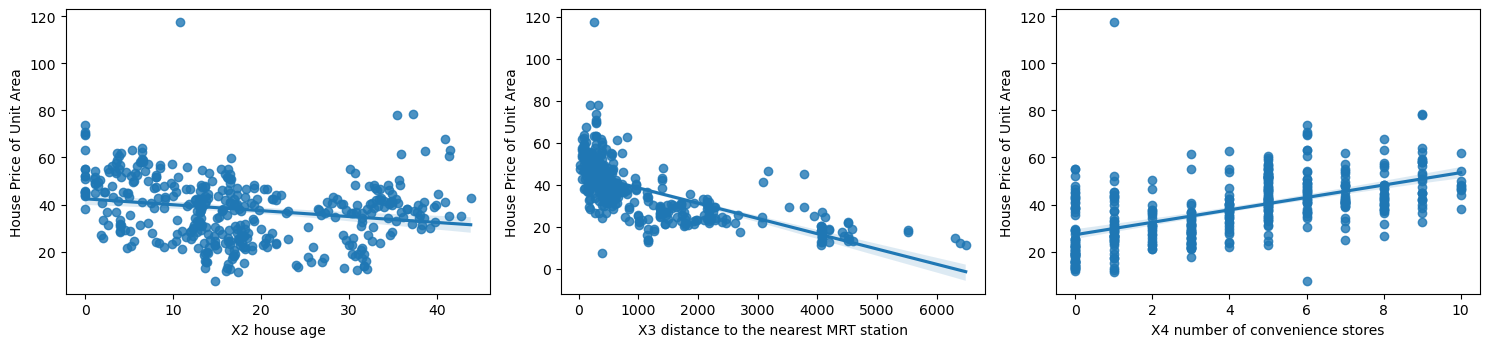

In [9]:
# Pisahkan variabel target (Y) dan variabel independen (X) yang berkolerasi
df_corr = df[['X2 house age', 
              'X3 distance to the nearest MRT station', 
              'X4 number of convenience stores', 
              'Y house price of unit area']]

# Buat plot regresi untuk setiap variabel yang berkolerasi dengan variabel target
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_corr.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=col, y='Y house price of unit area', data=df_corr)
    plt.xlabel(col)
    plt.ylabel('House Price of Unit Area')
plt.tight_layout()
plt.show()

In [10]:
# Drop kolom-kolom yang tidak berpengaruh
#df.drop(columns=['No', 'X1 transaction date', 'X2 house age'], inplace=True)

## **Multiple Linear Regressrion**

H0 : B1 = B2 = B3 = 0

Ha : B1 != B2 != B3 != 0

In [11]:
# Pisahkan data menjadi fitur (X) dan target (y)
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y = df["Y house price of unit area"]

In [12]:
# F-test untuk menentukan feature yang tidak berpengaruh
model_ols = sm.OLS(y, sm.add_constant(X)).fit()

In [13]:
print(model_ols.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.538
Method:                         Least Squares   F-statistic:                     161.1
Date:                        Fri, 23 Feb 2024   Prob (F-statistic):           5.44e-69
Time:                                11:21:29   Log-Likelihood:                -1506.5
No. Observations:                         414   AIC:                             3021.
Df Residuals:                             410   BIC:                             3037.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

## **Interpretation**

Significance Test:

- Simultant Test (F-Test):

Bi : P-Value untuk F-test (Prob (F-statistics)) bernilai 5.44e-69 atau berada di bawah 0.05. Hal ini berarti ada setidaknya satu fitur atau variabel yang berpengaruh kepada harga rumah.

- Partial Test (T-Test):
    
    1. B0 : Nilai P-Value berada di atas 0.05. Hal ini berarti menolak H0 dimana B0 digunakan.

    3. B1 : Nilai P-value berada di bawah 0.05. Hal ini menunjukan bahwa umur rumah mempengaruhi harga rumah.

    4. B2 : Nilai P-value berada di bawah 0.05. Hal ini menunjukan bahwa jarak rumah dengan stasiun MRT mempengaruhi harga rumah.

    5. B3 : Nilai P-value berada di bawah 0.05. Hal ini menunjukan bahwa jumlah toko swalayan yang berada di sekitarnya mempengaruhi harga rumah.


Parameter Estimate:

    1. B0 = 42.9773 : Parameter ini diperlukan. Dan juga nilai tersebut berada di dalam range (7.6 - 117.5 Dollar)
    
    2. B1 = -0.2529 : Ketika umur rumah bertambah 1 tahun, maka harga rumah akan berkurang 0.2529 Dollar.
    
    3. B2 = -0.0054 : Ketika jarah rumah dengan stasiun MRT sebesar 1 km, maka harga rumah akan berkurang sebesar 0.0054 Dollar.
    
    4. B3 = 1.2974 : Ketika terdapat satu toko swalayan yang berada di sekitar rumah, harga rumah akan bertambah sebesar 1.3 Dollar.
    
    5. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square adj =  53.8% : This model can explain 53.8% variation of tips.